# Initialise 

In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2
import c14
from c14 import livermodels as lm



In [4]:
data = pd.read_csv('./results/C14data_liver_samples_20190502.csv')
c14_patient_data = data.groupby(['type', 'sample', 'ploidy', 'pathology']).mean().dropna(how='all').reset_index()
c14_patient_data['age'] = c14_patient_data.Dcoll - c14_patient_data.Dbirth 
c14_patient_data['e14C'] = c14_patient_data.error_measurement
data = c14_patient_data.query('type == "hepatocyte"')
edata = c14.exp_data(data)

In [5]:
m  = lm.Pl2p()
op = c14.optimize(model=m,data=edata,step_size=2)
vis= c14.visualisze(model=m,data=edata)


In [9]:
op.loglike_dict(dict(lambda4=-1,delta4=-1,delta2=-1,kappa=-1))

81.8710330442249

In [10]:
m


Parameters are:
delta2 = 0.1
delta4 = 0.1
kappa = 0.1
lambda4 = 0.1

Implicit Parameters are:
lambda2 = [0.09779184991769264, 0.1029375897036036, 0.1069551847768588, 0.10925588767486123, 0.10911921785498678]
p = [0.9100601868847534, 0.8516321187523971, 0.677873347631821, 0.3946030268534627, 0.19494388889301023]

Variables are t=[0,25,50,75,100]:
n2
n4

Default parameters are:
kappa = 1
lambda4 = 1
delta2 = 1
delta4 = 1

Default limit are:
kappa = (1e-06, 100)
lambda4 = (1e-06, 100)
delta2 = (1e-06, 100)
delta4 = (1e-06, 100)

Default errors are:
kappa = 0.5
lambda4 = 0.5
delta2 = 0.5
delta4 = 0.5

In [11]:
m.limit['lambda4'] = (1e-99, 1e0)
m.limit['delta4'] = (1e-99, 1e0)
m.limit['delta2'] = (1e-99, 1e0)
m.limit['kappa'] = (1e-99, 0.1)

In [12]:
m


Parameters are:
delta2 = 0.1
delta4 = 0.1
kappa = 0.1
lambda4 = 0.1

Implicit Parameters are:
lambda2 = [0.09779184991769264, 0.1029375897036036, 0.1069551847768588, 0.10925588767486123, 0.10911921785498678]
p = [0.9100601868847534, 0.8516321187523971, 0.677873347631821, 0.3946030268534627, 0.19494388889301023]

Variables are t=[0,25,50,75,100]:
n2
n4

Default parameters are:
kappa = 1
lambda4 = 1
delta2 = 1
delta4 = 1

Default limit are:
kappa = (1e-99, 0.1)
lambda4 = (1e-99, 1.0)
delta2 = (1e-99, 1.0)
delta4 = (1e-99, 1.0)

Default errors are:
kappa = 0.5
lambda4 = 0.5
delta2 = 0.5
delta4 = 0.5

# Fit

In [13]:
res = op.optimize_minuit(dict(lambda4=-1,delta4=-1,delta2=-1,kappa=-1))

/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/base.py:112: UserWarning: Parameter kappa=0.10115794542598985 is outside the limits (1e-99, 0.1)
  warnings.warn(wstr,UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/base.py:112: UserWarning: Parameter kappa=0.10011519555381687 is outside the limits (1e-99, 0.1)
  warnings.warn(wstr,UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/base.py:112: UserWarning: Parameter kappa=0.10001151358822767 is outside the limits (1e-99, 0.1)
  warnings.warn(wstr,UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/base.py:112: UserWarning: Parameter kappa=0.1000011512991739 is outside the limits (1e-99, 0.1)
  warnings.warn(wstr,UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/base.py:112: UserWarning: Parameter kappa=0.10000011512932092 is outside the limits (1e-99, 0.1)
  warnings.warn(wstr,UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/opti

In [14]:
res

({'delta2': -1.0,
  'delta4': -0.3246916002314777,
  'kappa': -1.0,
  'lambda4': -1.0},
 {'delta2': nan, 'delta4': nan, 'kappa': nan, 'lambda4': nan},
 -99.31473726397799,
 True,
          delta2  delta4  kappa  lambda4
 delta2      NaN     NaN    NaN      NaN
 delta4      NaN     NaN    NaN      NaN
 kappa       NaN     NaN    NaN      NaN
 lambda4     NaN     NaN    NaN      NaN,
          delta2  delta4  kappa  lambda4
 delta2      NaN     NaN    NaN      NaN
 delta4      NaN     NaN    NaN      NaN
 kappa       NaN     NaN    NaN      NaN
 lambda4     NaN     NaN    NaN      NaN)

In [15]:
fit_limit = {'kappa': (-10, -1),
             'lambda4': (-10, 0),
             'delta2': (-10, 0),
             'delta4': (-10, 0)}

In [16]:
%%time
res_M = op.optimize_minuit_multistart(n=100,processes=7, fit_limit=fit_limit)

[(-10, 0), (-10, 0), (-10, -1), (-10, 0)]


/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: delta2 is negative
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: p is outside range
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: delta2 is negative
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: delta2 is negative
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: delta2 is negative
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/pr

CPU times: user 588 ms, sys: 168 ms, total: 756 ms
Wall time: 13min 21s


In [17]:
best_res = res_M.loc[res_M['fval'].idxmin()]

In [24]:
# best_res['errors']

{'delta2': nan, 'delta4': nan, 'kappa': nan, 'lambda4': nan}

# Visualise

In [19]:
m.set_parameters(best_res['values'])

True

In [20]:
m.nparas

4

In [21]:
op.loglike_dict(best_res['values'])

106.83480741457635

In [22]:
op.calc_aicc(best_res['values'])

-201.95532911486697

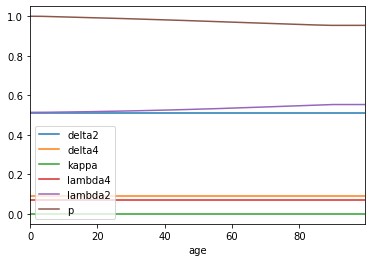

In [23]:
vis.plot_parameter()
plt.legend()
plt.show()

In [22]:
po = best_res['values']
m.set_parameters(po)
_ = vis.odeint()

In [ ]:
vis.plot_generic()

In [ ]:
vis.plot_simdata()

In [ ]:
#vis.plot_simdata_birth()

In [ ]:
l = vis.plot_parameter(log=True,nonlog=['p'])
plt.legend()

In [ ]:
vis.plot_parameter(log=True)
plt.legend()

In [ ]:
m